<h1 style='text-align:center'>Titanic.</h1>
<br>

![](http://media.giphy.com/media/1Nk9bIidJVTy0/giphy.gif)

导入相关的数据和类库


In [137]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#import train and test data.
train=pd.read_csv('input/train.csv')
test=pd.read_csv('input/test.csv')
name=train.Name
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


在今天的数据集中有两组数据:
- 训练集 (train.csv)
- 测试集 (test.csv)
<br>
训练集的数据中包含性别 票价 船舱等级和是否存活下来等信息，这些信息用来创建机器学习模型。
<br><br>
在测试集中不包含人员是否存活信息
<br><br>
<h4>变量定义</h4>
- 是否存活
 - 0= 死亡
 - 1= 存活
- pclass (船舱等级)
 - 1=1st  头等
 - 2=2nd  二等
 - 3=3rd  三等
 
- sex  性别
<br>

- age  年龄


- sibsp (兄弟姐妹数量 / 配偶数)
<br>
- parch (父母数量 / 小孩)
<br>
- tickets  船票序列号
<br>
- fare  票价
<br>
- cabin  船舱位置
- embarked 上船港口
 - C = Cherbourg, 法国瑟堡
 - Q = Queenstown,  爱尔兰城市皇后镇（又译昆士敦）
 - S = Southampton  英国 南安普顿
- pclass: 船舱等级 ()
<br>
<h4></h4>
 - 1st = 头等
 - 2nd = 中等
 - 3rd = 三等



Part 1 数据清理

In [138]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


数据集中的不同类型
四类数据集

数字类特征: 年龄，票价，兄弟姐妹配偶数量，父母小孩数量

类别特征: 性别，港口，船舱等级，是否存活

包含数字和字符的特征: 船票和船舱

文字类特征: 姓名

** 在做数据整理的过程中我们会对上述四类数据进行调整**

In [139]:
train.shape

(891, 12)

In [140]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**如何处理数据空值，利用Imputer方法(sklearn.preprocessing.Imputer)**

In [141]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer 
Imp=SimpleImputer(missing_values=np.nan,strategy='median')
new=Imp.fit_transform(train.Age.values.reshape(1,-1))
new= pd.DataFrame(new)
train['Age2']=new.T

In [142]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age2           177
dtype: int64

In [143]:
train.drop('Age',axis=1,inplace=True)

In [144]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age2           177
dtype: int64

In [145]:
train.set_index('PassengerId',inplace=True)
## get dummy variables for Column sex and embarked since they are categorical value.
train = pd.get_dummies(train, columns=["Sex"], drop_first=True)
train = pd.get_dummies(train, columns=["Embarked"],drop_first=True)


In [146]:
train.head(5)

,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Cabin,Age2,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,NaN,22.0,1,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,C85,38.0,0,0,0
3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,NaN,26.0,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,C123,35.0,0,0,1
5,0,3,"Allen, Mr. William Henry",0,0,373450,8.0500,NaN,35.0,1,0,1


In [147]:
train['Fare'] = train['Fare'].astype(int)
train.loc[train.Fare<=7.91,'Fare']=0
train.loc[(train.Fare>7.91) &(train.Fare<=14.454),'Fare']=1
train.loc[(train.Fare>14.454)&(train.Fare<=31),'Fare']=2
train.loc[(train.Fare>31),'Fare']=3

In [148]:
train.head(5)

,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Cabin,Age2,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,0,NaN,22.0,1,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,3,C85,38.0,0,0,0
3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,0,NaN,26.0,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,3,C123,35.0,0,0,1
5,0,3,"Allen, Mr. William Henry",0,0,373450,1,NaN,35.0,1,0,1


In [151]:
train['Age2']=train['Age2'].fillna(0)
train['Age2']=train['Age2'].astype(int)
train.loc[ train['Age2'] <= 16, 'Age2']= 0
train.loc[(train['Age2'] > 16) & (train['Age2'] <= 32), 'Age2'] = 1
train.loc[(train['Age2'] > 32) & (train['Age2'] <= 48), 'Age2'] = 2
train.loc[(train['Age2'] > 48) & (train['Age2'] <= 64), 'Age2'] = 3
train.loc[train['Age2'] > 64, 'Age2'] = 4

In [155]:
train.head(5)

,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Cabin,Age2,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,0,NaN,1,1,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,3,C85,2,0,0,0
3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,0,NaN,1,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,3,C123,2,0,0,1
5,0,3,"Allen, Mr. William Henry",0,0,373450,1,NaN,2,1,0,1


In [156]:
train.drop(['Ticket','Cabin','Name'],axis=1,inplace=True)
train.head()
print(type(train.Age2))

<class 'pandas.core.series.Series'>


In [157]:
train.head()

,Survived,Pclass,SibSp,Parch,Fare,Age2,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,1,0,0,1,1,0,1
2,1,1,1,0,3,2,0,0,0
3,1,3,0,0,0,1,0,0,1
4,1,1,1,0,3,2,0,0,1
5,0,3,0,0,1,2,1,0,1


Part2 EDA

In [158]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [159]:
train.Survived.value_counts()/len(train)*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [160]:
train.describe()

,Survived,Pclass,SibSp,Parch,Fare,Age2,Sex_male,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.523008,0.381594,1.453423,1.089787,0.647587,0.086420,0.722783
std,0.486592,0.836071,1.102743,0.806057,1.124206,0.966179,0.477990,0.281141,0.447876
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,0.000000,2.000000,2.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,8.000000,6.000000,3.000000,4.000000,1.000000,1.000000,1.000000


In [161]:
train.groupby('Sex_male').mean()

,Survived,Pclass,SibSp,Parch,Fare,Age2,Embarked_Q,Embarked_S
Sex_male,,,,,,,,
0,0.742038,2.159236,0.694268,0.649682,1.815287,1.114650,0.114650,0.646497
1,0.188908,2.389948,0.429809,0.235702,1.256499,1.076256,0.071057,0.764298


通过统计分析发现，总的生存率是38%
其中女性的存活率是74%，男性的存活率是19%

使用相关性矩阵和热力图演示关联度

In [162]:
train.corr()

,Survived,Pclass,SibSp,Parch,Fare,Age2,Sex_male,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.035322,0.081629,0.301792,0.010260,-0.543351,0.003650,-0.155660
Pclass,-0.338481,1.000000,0.083081,0.018443,-0.660699,0.028248,0.131900,0.221009,0.081720
SibSp,-0.035322,0.083081,1.000000,0.414838,0.365893,0.002277,-0.114631,-0.026354,0.070941
Parch,0.081629,0.018443,0.414838,1.000000,0.363097,-0.029616,-0.245489,-0.081228,0.063036
Fare,0.301792,-0.660699,0.365893,0.363097,1.000000,-0.003387,-0.237585,-0.227213,-0.035715
Age2,0.010260,0.028248,0.002277,-0.029616,-0.003387,1.000000,-0.018994,0.004494,-0.017715
Sex_male,-0.543351,0.131900,-0.114631,-0.245489,-0.237585,-0.018994,1.000000,-0.074115,0.125722
Embarked_Q,0.003650,0.221009,-0.026354,-0.081228,-0.227213,0.004494,-0.074115,1.000000,-0.496624
Embarked_S,-0.155660,0.081720,0.070941,0.063036,-0.035715,-0.017715,0.125722,-0.496624,1.000000


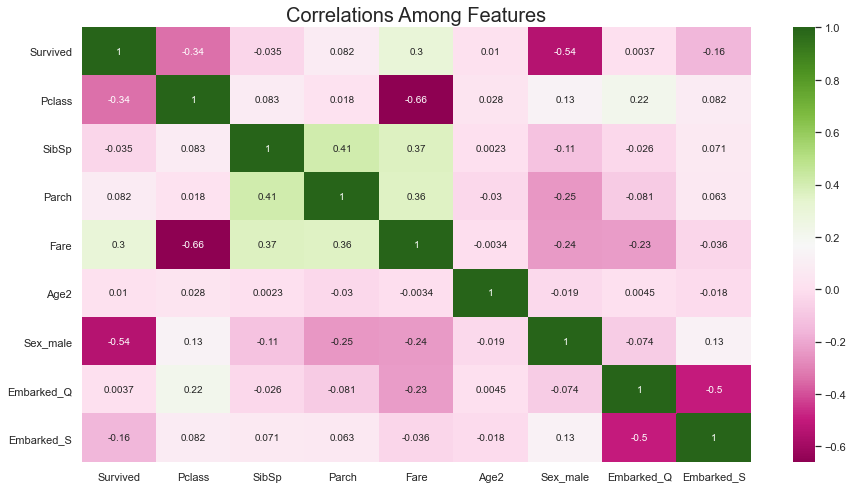

In [163]:
plt.subplots(figsize = (15,8))
sns.heatmap(train.corr(), annot=True,cmap="PiYG")
plt.title("Correlations Among Features", fontsize = 20);

其中正相关的部分最明显的是船票价格和生存率 达到0.26
负相关部分 性别和生存率之间是 -0.54
          船票价格和船舱等级是 -0.55
          船舱等级和生存率之间是 -0.34

性别和生存率的关系

([<matplotlib.axis.XTick at 0x2101c3430a0>,
 [Text(0, 0, 'Female'), Text(0, 0, 'Male')])

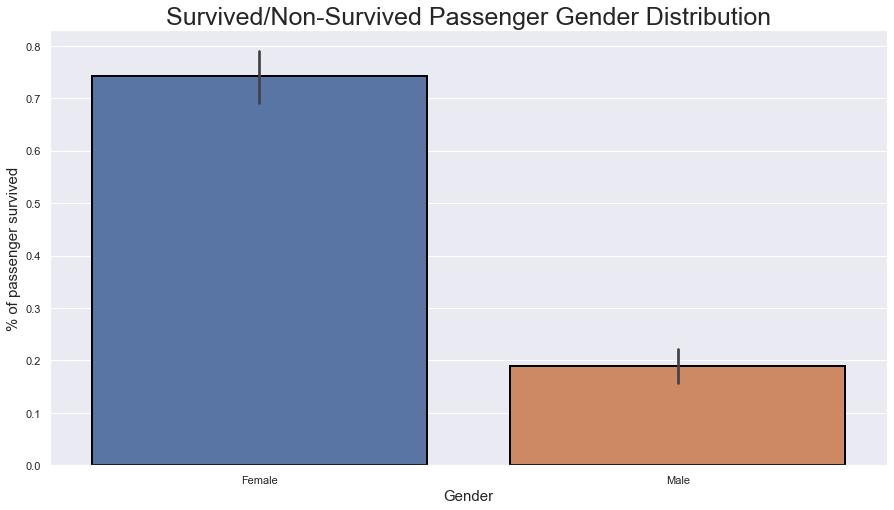

In [164]:
plt.subplots(figsize = (15,8))
sns.barplot(x = "Sex_male", y = "Survived", data=train, edgecolor=(0,0,0), linewidth=2)
plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 25)
labels = ['Female', 'Male']
plt.ylabel("% of passenger survived", fontsize = 15)
plt.xlabel("Gender",fontsize = 15)
plt.xticks(sorted(train.Sex_male.unique()), labels)

女性的存活率是74%，男性的存活率是19%

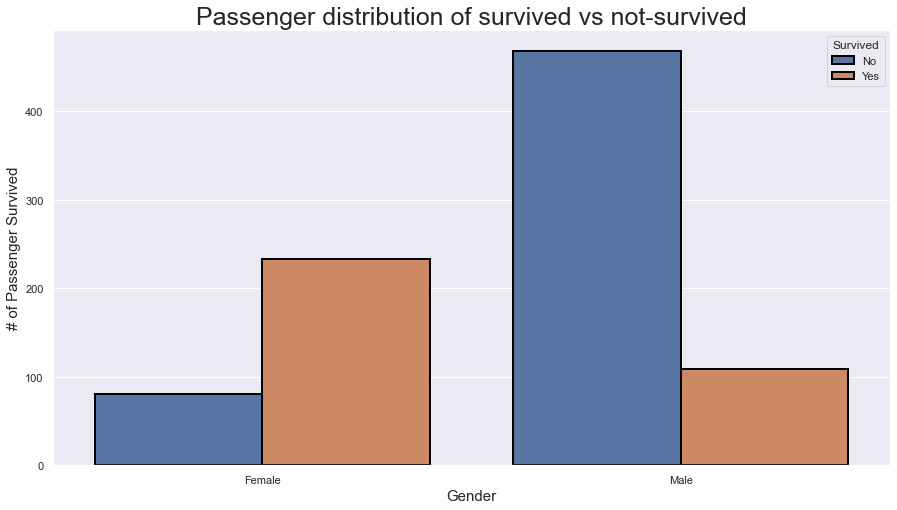

In [165]:
sns.set(style='darkgrid')
plt.subplots(figsize = (15,8))
ax=sns.countplot(x='Sex_male',data=train,hue='Survived',edgecolor=(0,0,0),linewidth=2)
train.shape
## Fixing title, xlabel and ylabel
plt.title('Passenger distribution of survived vs not-survived',fontsize=25)
plt.xlabel('Gender',fontsize=15)
plt.ylabel("# of Passenger Survived", fontsize = 15)
labels = ['Female', 'Male']
#Fixing xticks.
plt.xticks(sorted(train.Survived.unique()),labels)
## Fixing legends
leg = ax.get_legend()
leg.set_title('Survived')
legs=leg.texts
legs[0].set_text('No')
legs[1].set_text('Yes')

结论 在这场灾难中 女士优先

船舱等级和生存率

In [166]:
train.head(4)

,Survived,Pclass,SibSp,Parch,Fare,Age2,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,1,0,0,1,1,0,1
2,1,1,1,0,3,2,0,0,0
3,1,3,0,0,0,1,0,0,1
4,1,1,1,0,3,2,0,0,1


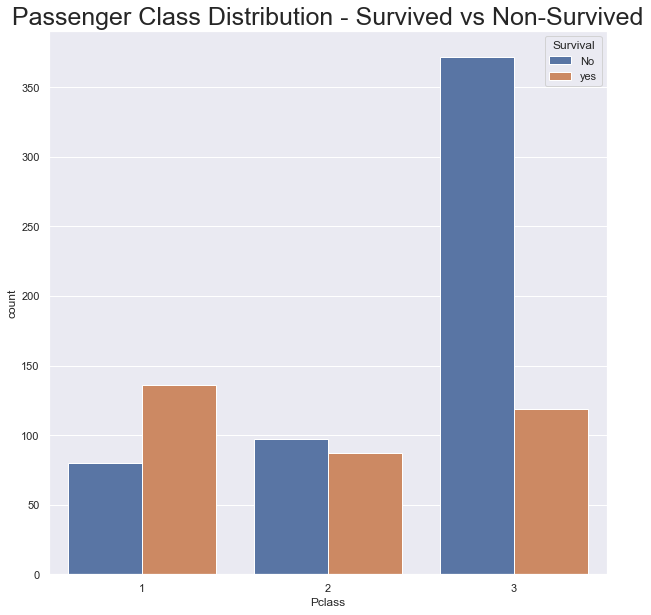

In [167]:
plt.subplots(figsize = (10,10))
ax=sns.countplot(x='Pclass',hue='Survived',data=train)
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25)
leg=ax.get_legend()
leg.set_title('Survival')
legs=leg.texts

legs[0].set_text('No')
legs[1].set_text("yes")


头等舱的客人存活率是63%
二等舱的客人存活率是48%
三等舱的客人存活率是24%

([<matplotlib.axis.XTick at 0x2101c4476d0>,
 [Text(0, 0, 'First'), Text(0, 0, 'Second'), Text(0, 0, 'Third')])

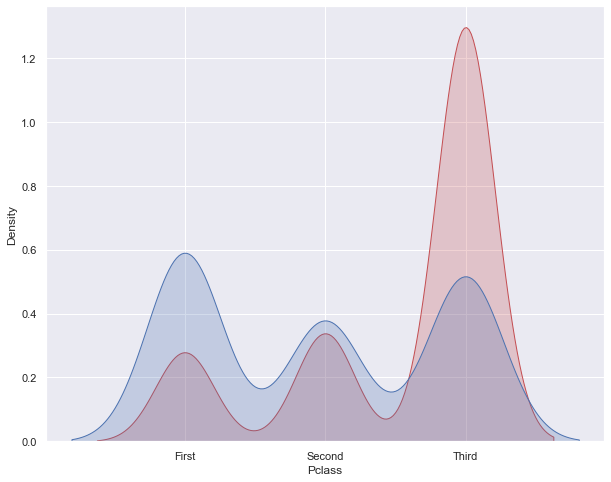

In [168]:
plt.subplots(figsize=(10,8))
sns.kdeplot(train.loc[(train['Survived'] == 0),'Pclass'],shade=True,color='r',label='Not Survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Pclass'],shade=True,color='b',label='Survived' )

labels = ['First', 'Second', 'Third']
plt.xticks(sorted(train.Pclass.unique()),labels)

票价和生存率

Text(0.5, 0, 'Fare')

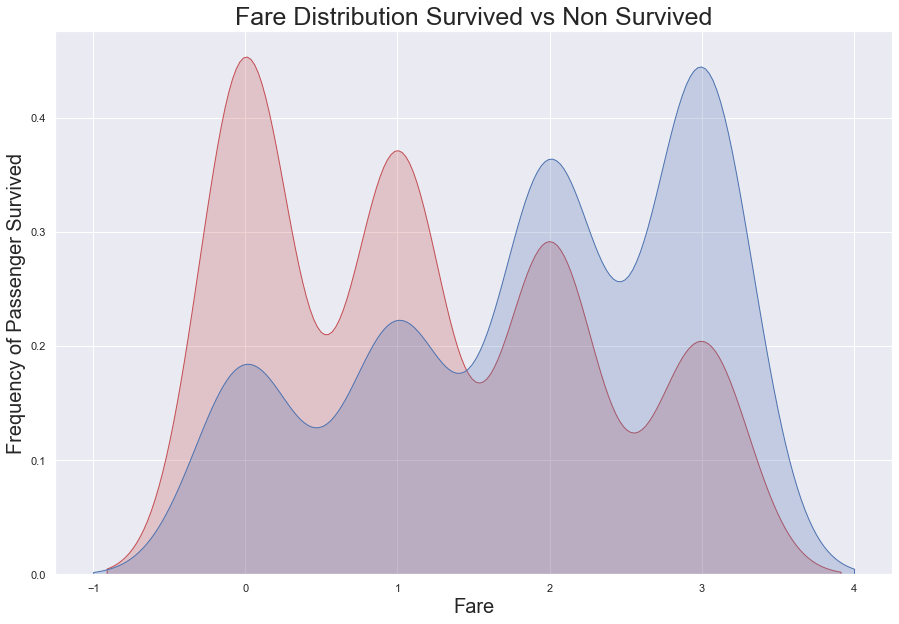

In [169]:
plt.subplots(figsize=(15,10))

ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Fare'],color='r',shade=True,label='Not Survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Fare'],color='b',shade=True,label='Survived' )
plt.title('Fare Distribution Survived vs Non Survived',fontsize=25)
plt.ylabel('Frequency of Passenger Survived',fontsize=20)
plt.xlabel('Fare',fontsize=20)

年龄和生存率

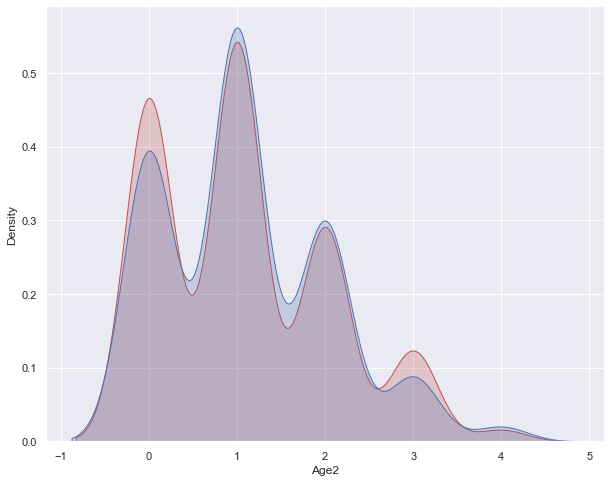

In [170]:
fig,axs=plt.subplots(figsize=(10,8))
sns.set_style(style='darkgrid')
sns.kdeplot(train.loc[(train['Survived']==0),'Age2'],color='r',shade=True,label='Not Survived')
sns.kdeplot(train.loc[(train['Survived']==1),'Age2'],color='b',shade=True,label='Survived')

In [171]:
train.head(5)

,Survived,Pclass,SibSp,Parch,Fare,Age2,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,1,0,0,1,1,0,1
2,1,1,1,0,3,2,0,0,0
3,1,3,0,0,0,1,0,0,1
4,1,1,1,0,3,2,0,0,1
5,0,3,0,0,1,2,1,0,1
